In [2]:
'''Numerical Study'''

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

import numpy as np

import pandas as pd

In [20]:
Policy="Stay"

'''Load data'''

Order_df=pd.read_csv('./Data/NYC_Trips/Dispatched_Order_df_'+Policy+'.csv')

Order_df=Order_df.drop(columns=['Unnamed: 0'])

Driver_df=pd.read_csv('./Data/NYC_Trips/Dispatched_Driver_df_'+Policy+'.csv')

Driver_df=Driver_df.drop(columns=['Unnamed: 0'])



In [17]:
Order_CNT=pd.read_csv('./Data/NYC_Trips/Order_CNT.csv')

Order_CNT=Order_CNT.drop(columns=['Unnamed: 0'])

Order_CNT['Status']=Order_CNT.apply(lambda x:1 if x['Arrive_step']==x['Response_step'] and x['Driver_id']!='Waiting' else 0,axis=1)

Order_CNT=Order_CNT.groupby(['Arrive_step','Pickup_Zone']).count()

Order_CNT['Transition']=Order_CNT.index

Order_CNT['Step']=Order_CNT.apply(lambda x:x['Transition'][0],axis=1)

Order_CNT['Zone']=Order_CNT.apply(lambda x:x['Transition'][1],axis=1)

Order_CNT=Order_CNT.reset_index(drop=True)

Order_CNT=Order_CNT.rename(index=str, columns={'Order_id': 'Order_Cnt'})

Order_CNT=Order_CNT[['Step','Zone','Order_Cnt']]

Order_CNT



,Step,Zone,Order_Cnt
0,2520,Zone_43,1
1,2521,Zone_17,1
2,2521,Zone_18,1
3,2521,Zone_30,1
4,2521,Zone_43,1
5,2521,Zone_61,1
6,2521,Zone_8,2
7,2522,Zone_10,1
8,2522,Zone_11,2
9,2522,Zone_33,1


In [29]:
'''Idle Drivers'''

Driver_CNT=Driver_df.groupby(['Step','Zone']).count()

Driver_CNT['Transition']=Driver_CNT.index

Driver_CNT['Step']=Driver_CNT.apply(lambda x:x['Transition'][0],axis=1)

Driver_CNT['Zone']=Driver_CNT.apply(lambda x:x['Transition'][1],axis=1)

Driver_CNT=Driver_CNT.reset_index(drop=True)

Driver_CNT=Driver_CNT.rename(index=str, columns={'Driver_id': 'Driver_Cnt'})

Driver_CNT=Driver_CNT[['Step','Zone','Driver_Cnt']]

Driver_CNT



,Step,Zone,Driver_Cnt
0,2520,Zone_0,28
1,2520,Zone_1,17
2,2520,Zone_10,40
3,2520,Zone_11,45
4,2520,Zone_12,180
5,2520,Zone_13,77
6,2520,Zone_14,31
7,2520,Zone_15,15
8,2520,Zone_16,9
9,2520,Zone_17,31


In [30]:
'''Matched Drivers'''

Match_CNT=Driver_df.loc[Driver_df['Order_id']!='Idle']

Match_CNT=Match_CNT.groupby(['Step','Zone']).count()

Match_CNT['Transition']=Match_CNT.index

Match_CNT['Step']=Match_CNT.apply(lambda x:x['Transition'][0],axis=1)

Match_CNT['Zone']=Match_CNT.apply(lambda x:x['Transition'][1],axis=1)

Match_CNT=Match_CNT.reset_index(drop=True)

Match_CNT=Match_CNT.rename(index=str, columns={'Driver_id': 'Match_Cnt'})

Match_CNT=Match_CNT[['Step','Zone','Match_Cnt']]

Match_CNT

,Step,Zone,Match_Cnt
0,2520,Zone_43,1
1,2521,Zone_17,1
2,2521,Zone_30,1
3,2521,Zone_42,1
4,2521,Zone_58,1
5,2521,Zone_61,1
6,2521,Zone_8,2
7,2522,Zone_10,1
8,2522,Zone_11,2
9,2522,Zone_33,1


In [46]:
'''Driver CNT'''

Driver_Overall=Driver_CNT.merge(Match_CNT,on=['Step','Zone'],how='left')

Driver_Overall=Driver_Overall.fillna(0)

Driver_Overall['Prob']=Driver_Overall.apply(lambda x:x['Match_Cnt']/x['Driver_Cnt'],axis=1)

Overall=Driver_Overall.merge(Order_CNT,on=['Step','Zone'],how='left')

Overall=Overall.fillna(0)

Overall['Ratio']=Overall.apply(lambda x:x['Order_Cnt']/x['Driver_Cnt'],axis=1)

Overall=Overall.loc[(Overall['Prob']!=0)&(Overall['Ratio']!=0)]

Overall['log']=Overall.apply(lambda x:np.log(1-x['Prob']),axis=1)

Overall['theta']=Overall.apply(lambda x:x['log']/(-1*x['Ratio']),axis=1)

Overall


/Users/yueyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


,Step,Zone,Driver_Cnt,Match_Cnt,Prob,Order_Cnt,Ratio,log,theta
36,2520,Zone_43,16,1.0,0.062500,1.0,0.062500,-0.064539,1.032616
76,2521,Zone_17,31,1.0,0.032258,1.0,0.032258,-0.032790,1.016485
89,2521,Zone_30,47,1.0,0.021277,1.0,0.021277,-0.021506,1.010792
123,2521,Zone_61,35,1.0,0.028571,1.0,0.028571,-0.028988,1.014564
132,2521,Zone_8,36,2.0,0.055556,2.0,0.055556,-0.057158,1.028851
136,2522,Zone_10,40,1.0,0.025000,1.0,0.025000,-0.025318,1.012712
137,2522,Zone_11,45,2.0,0.044444,2.0,0.044444,-0.045462,1.022903
159,2522,Zone_33,37,1.0,0.027027,1.0,0.027027,-0.027399,1.013762
187,2522,Zone_59,49,1.0,0.020408,1.0,0.020408,-0.020619,1.010345
198,2522,Zone_7,83,1.0,0.012048,1.0,0.012048,-0.012121,1.006073


In [50]:
'''Estimated theta'''

theta_=Overall.loc[Overall['theta']!=float('inf'),'theta'].mean()

theta_

1.247163471041952

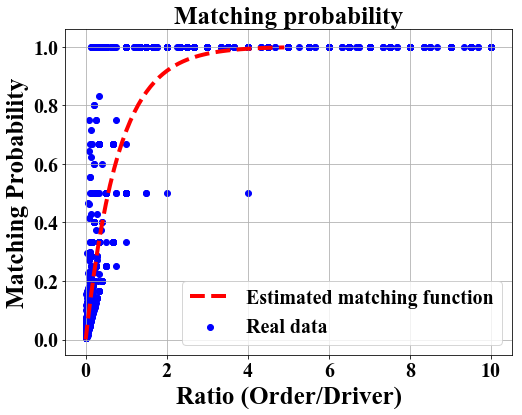

In [60]:
figsize = 8,6

font_label = {'family' : 'Times New Roman','weight' : 'normal','size': 25}

font_legend = {'family' : 'Times New Roman','weight' : 'normal','size': 20}

figure, ax1 = plt.subplots(figsize=figsize)

labels = ax1.get_xticklabels() + ax1.get_yticklabels()

[label.set_fontsize(20) for label in labels]

[label.set_fontname('Times New Roman') for label in labels]

x=np.arange(0, 5, 0.1)

Matching=lambda x,theta:1-np.exp(-1*theta*x)

y=Matching(x,theta_)

l1=ax1.scatter(Overall.loc[Overall['Ratio']<=10,'Ratio'],Overall.loc[Overall['Ratio']<=10,'Prob'],color='b',label='Real data')

l2=ax1.plot(x,y,'r--',linewidth=4,label='Estimated matching function')

ax1.set_title('Matching probability',font_label) 

ax1.set_ylabel('Matching Probability',font_label) 

ax1.set_xlabel('Ratio (Order/Driver)',font_label)

ax1.legend(loc = 'lower right',prop=font_legend)

plt.grid()

plt.show()